In [1]:
from IPython.display import Image

## Vectors

- A vector is a quantity that has both ***magnitude and direction***.

**Examples:**
- I travel 30 km in Northerly direction (**magnitude** is 30 km, **direction** is North - this is a displacement vector)
- The train is going 80 km/hr towards sydney (**magnitude** is 80 km/hr, **direction** is 'towards sydney' - it is a velocity vector)

<img src=https://www.intmath.com/vectors/img/1D-vectors.gif></img>

## 2-D vector

vector goes in **two direction**

for example, vector with an x-component of 4 and y-component of 3 that has started at origin would end at coordinates (4,3)

<img src="https://study.com/cimages/multimages/16/2d_vector_coordinates.png"></img>

## Feature Vector

**Example is taken in 3-Dimension**

In [2]:
import warnings;warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [3]:
data = pd.DataFrame(data={'# hours studied':[10,8,5],'# hours playing games':[3,20,1],'# classes missed':[0,2,5],'grade':[87,75,63]},index=["nisha","jayaraj","sriram"])

In [4]:
data

,# hours studied,# hours playing games,# classes missed,grade
nisha,10,3,0,87
jayaraj,8,20,2,75
sriram,5,1,5,63


In [5]:
X = data.to_numpy()[:,:-1]
X

array([[10,  3,  0],
       [ 8, 20,  2],
       [ 5,  1,  5]], dtype=int64)

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

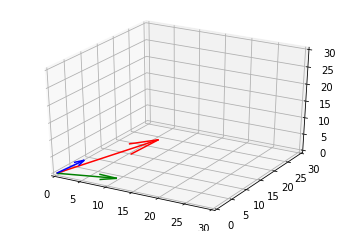

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver([0], [0], [0],X[:,0][0], X[:,1][0], X[:,2][0],color='g')
ax.quiver([0], [0], [0],X[:,0][1], X[:,1][1], X[:,2][1],color='r')
ax.quiver([0], [0], [0],X[:,0][2], X[:,1][2], X[:,2][2],color='b')
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])
ax.set_zlim([0, 30])
plt.show()

### Length of a vector:
\begin{equation*}
\sqrt{a^2 + b^2 + c^2}
\end{equation*}

where a,b,c are magnitude of vector.

Length of a vector uses pythogoras theorem

In [8]:
def vector_length(v):
    return np.sqrt(np.sum(np.square(v),0))

In [9]:
vector_length(X[0])

10.44030650891055

### Euclidean distance:
\begin{equation*}
dist(x,y) = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2 + ..... + (x_m-y_m)^2 }
\end{equation*}

where x and y are vectors,each of m - dimensional

In otherwords, we can say **length of vector = euclidean distance between vector and origin**

<img src="http://rosalind.info/media/Euclidean_distance.png"></img>

    by pythagorean theorem, we derive above formula

In [10]:
def euclidean_distance(x,y):
    return np.sqrt(np.sum(np.square(x-y),0))

In [11]:
euclidean_distance(X[0],X[1])

17.233687939614086

#### Addition of 2 vectors:

In [12]:
Y = X[0] + X[1]

***each component of vectors gets sum up***

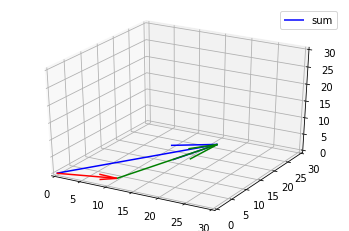

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver([0], [0], [0],X[:,0][0], X[:,1][0], X[:,2][0],color='r')
ax.quiver(X[:,0][0], X[:,1][0], X[:,2][0],X[:,0][1], X[:,1][1], X[:,2][1],color='g')
ax.quiver([0], [0], [0],Y[0], Y[1], Y[2],color='b',label='sum')
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])
ax.set_zlim([0, 30])
plt.legend()
plt.show()

### Mean of vectors:

In [14]:
Y = (X[0] + X[1] + X[2])/3

***each component will be mean of vectors***

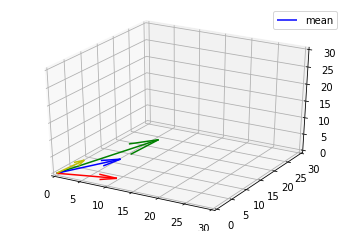

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver([0], [0], [0],X[:,0][0], X[:,1][0], X[:,2][0],color='r')
ax.quiver([0],[0],[0],X[:,0][1], X[:,1][1], X[:,2][1],color='g')
ax.quiver([0], [0], [0],X[:,0][2], X[:,1][2], X[:,2][2],color='y')
ax.quiver([0], [0], [0],Y[0], Y[1], Y[2],color='b',label='mean')
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])
ax.set_zlim([0, 30])
plt.legend()
plt.show()

### Dot product:

\begin{equation*}
\vec{a}.\vec{b} = |\vec{a}||\vec{b}|.cos\theta
\end{equation*}

    the dot product tell us, how much of one vector is following in the same path as the other vector
    

    Assume you are pulling an object in one direction with a force 5 and an another person also started pulling the same object

    1. suppose 2nd person pulling in your direction with force 5 (cos 𝜃 = 1). So 2nd person will help you with same force
    2. suppose 2nd person pulling in opposite direction with force 5 (cos 𝜃 = -1). So 2nd person will stop you with same force.
    3. if he is pulling some angle to your pulling, the impact may depend upon angle between two force.

### Cosine similarity:

- *measure of similarity between two non zero vectors*
- *measures the cosine of the angle between them*

In [16]:
def vector_similarity(a,b):
    length_a = np.sqrt(np.sum(np.square(a),0))
    length_b = np.sqrt(np.sum(np.square(b),0))
    return np.sum(a*b)/(length_a*length_b)

In [17]:
vector_similarity(X[0],X[1])

0.6198574997554974

## What is Embedding?

- An embedding is a mapping of a ***discrete or categorical variable to a vector of continuous numbers***.
- In the context of neural networks, embeddings are low-dimensional, learned continuous vector representations of discrete variable

**Word Embedding:**

    Word embedding is capable of capturing context of a word in a document, semantic and syntatic similarity, relation with other word etc.,
    
**Why needed?**
    
    Computer can match strings and tell us that they are same or not, but how do we make computers tell us about football or Ronaldo when we search for Messi

#### Limitations of one hot encoding:

1. For high-cardinality variables -- those with many unique categories -- the dimensionality of the transformed vector becomes unmanageable
        
        i.e., if vocabulary text is 45000, then vector is of 45000 dimension
2. The mapping is completely uninformed: "similar" categories are not placed close to each other in embedding space.
        
        i.e., if we measure cosine similarity between vectors, the similarity is 0 for every comparison between entities

Consider two similar sentences:
    1. have a good day
    2. have a great day

In [18]:
V = {"have","a","good","great","day"}

In [19]:
one_hot = {'have':[1,0,0,0,0],
           'a':[0,1,0,0,0],
           'good':[0,0,1,0,0],
           'great':[0,0,0,1,0],
           'day':[0,0,0,0,1]
          }


*Cosine similarity between **good** and **great** using ONE-HOT encoding*

In [20]:
vector_similarity(np.array(one_hot['good']),np.array(one_hot['great']))

0.0

## Word2Vec

    Word2vec model is used to learn vector representation of words called "word embeddings".

#### CBOW model

<img src="https://miro.medium.com/max/596/0*CCsrTAjN80MqswXG"></img>

#### Skip-gram model
<img src="https://miro.medium.com/max/1400/0*Ta3qx5CQsrJloyCA.png" height=10 width=500></img>

In [21]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [22]:
corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]

In [23]:
tokenized_corpus=[]
for doc in corpus:
    tokenized_corpus.append(doc.split())

In [24]:
tokenized_corpus

[['he', 'is', 'a', 'king'],
 ['she', 'is', 'a', 'queen'],
 ['he', 'is', 'a', 'man'],
 ['she', 'is', 'a', 'woman'],
 ['warsaw', 'is', 'poland', 'capital'],
 ['berlin', 'is', 'germany', 'capital'],
 ['paris', 'is', 'france', 'capital']]

In [25]:
vocabulary={}
for sentence in tokenized_corpus:
    for word in sentence:
        if word not in vocabulary:
            vocabulary[word]=len(vocabulary)

In [26]:
vocabulary

{'he': 0,
 'is': 1,
 'a': 2,
 'king': 3,
 'she': 4,
 'queen': 5,
 'man': 6,
 'woman': 7,
 'warsaw': 8,
 'poland': 9,
 'capital': 10,
 'berlin': 11,
 'germany': 12,
 'paris': 13,
 'france': 14}

In [27]:
w = 2 # WINDOW_SIZE

In [28]:
words_targ_pair = []
for doc in tokenized_corpus:
    for i,_ in enumerate(doc):
        words_targ_pair.append((doc[max(0,i-w):i]+doc[i+1:i+w+1],doc[i]))

In [29]:
words_targ_pair = []
for doc in tokenized_corpus:
    for i,_ in enumerate(doc):
        words_targ_pair.append((doc[max(0,i-w):i]+doc[i+1:i+w+1],doc[i]))

In [30]:
words_targ_pair[:10]

[(['is', 'a'], 'he'),
 (['he', 'a', 'king'], 'is'),
 (['he', 'is', 'king'], 'a'),
 (['is', 'a'], 'king'),
 (['is', 'a'], 'she'),
 (['she', 'a', 'queen'], 'is'),
 (['she', 'is', 'queen'], 'a'),
 (['is', 'a'], 'queen'),
 (['is', 'a'], 'he'),
 (['he', 'a', 'man'], 'is')]

In [31]:
idx_targ_pairs = []
for words,targ in words_targ_pair:
    idx_targ_pairs.extend([(vocabulary[word],vocabulary[targ]) for word in words])
idx_targ_pairs[:10]

[(1, 0),
 (2, 0),
 (0, 1),
 (2, 1),
 (3, 1),
 (0, 2),
 (1, 2),
 (3, 2),
 (1, 3),
 (2, 3)]

In [32]:
def get_input(a):
    x = torch.zeros(len(a),len(vocabulary))
    x[range(len(a)),a]=1
    return x

In [66]:
class Word2vec(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(len(vocabulary),100)
        self.output = nn.Linear(100,len(vocabulary))
    def forward(self,x):
        x = self.hidden(x)
        x = self.output(x)
        return x

In [67]:
model = Word2vec()

In [68]:
crit = nn.CrossEntropyLoss()

In [69]:
optimizer = optim.SGD(model.parameters(),lr=0.001)

In [70]:
inputs,targets = [],[]
for i,j in idx_targ_pairs:
    inputs.append(i)
    targets.append(j)

In [71]:
len(inputs)

70

In [72]:
bs = 16

In [73]:
for epoch in range(100):
    total_loss = 0.0
    itr=0
    for i in range(0,len(inputs),bs):
        
        x = get_input(inputs[i:i+bs])
        y = torch.LongTensor(targets[i:i+bs])
    
        optimizer.zero_grad()
        preds = model(x)
        loss = crit(preds,y)
        loss.backward()
        optimizer.step()
        
        total_loss+=(loss.item()*x.shape[0])
        itr+=x.shape[0]
    print("epoch:",epoch+1,total_loss/itr)

epoch: 1 2.6859061104910715
epoch: 2 2.6844041551862445
epoch: 3 2.6829056331089567
epoch: 4 2.6814109325408935
epoch: 5 2.6799200330461774
epoch: 6 2.67843245778765
epoch: 7 2.676948595046997
epoch: 8 2.6754684925079344
epoch: 9 2.673991993495396
epoch: 10 2.6725190571376256
epoch: 11 2.671049669810704
epoch: 12 2.669584063121251
epoch: 13 2.668121780667986
epoch: 14 2.6666631358010426
epoch: 15 2.665208217075893
epoch: 16 2.663756663458688
epoch: 17 2.662308781487601
epoch: 18 2.6608646392822264
epoch: 19 2.6594239371163506
epoch: 20 2.6579866204942975
epoch: 21 2.6565530232020786
epoch: 22 2.655122900009155
epoch: 23 2.6536963394709994
epoch: 24 2.652273232596261
epoch: 25 2.6508536679404124
epoch: 26 2.649437611443656
epoch: 27 2.6480251925332206
epoch: 28 2.646616165978568
epoch: 29 2.6452104909079415
epoch: 30 2.6438085896628243
epoch: 31 2.642409999029977
epoch: 32 2.6410150051116945
epoch: 33 2.639623430797032
epoch: 34 2.6382353033338273
epoch: 35 2.636850847516741
epoch: 36 2

In [74]:
a = model.hidden.weight[13].detach().numpy()

In [75]:
b = model.hidden.weight[14].detach().numpy()

In [76]:
vector_similarity(a,b)

0.43332073